In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D, proj3d

In [2]:
np.random.seed(69420)

In [9]:
mean_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [ 0, 0, 1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [10]:
mean_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [ 0, 0, 1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

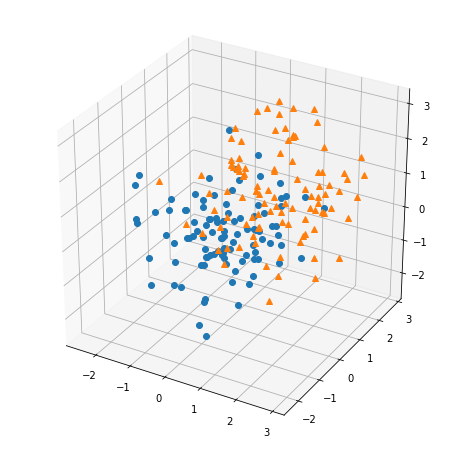

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')

plt.show()

In [13]:
all_data = np.concatenate((class1, class2))

In [25]:
pca = PCA(n_components=2)
transform_data = pca.fit_transform(all_data)

In [15]:
pca.components_

array([[-0.57010864, -0.52112343, -0.6351429 ],
       [-0.36362839, -0.53318488,  0.76386404]])

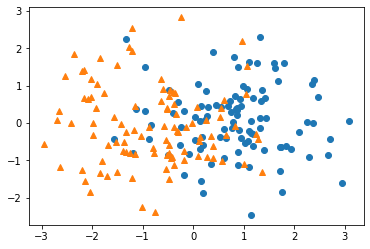

In [21]:
plt.plot(transform_data[0:100, 0], transform_data[0:100, 1], 'o')
plt.plot(transform_data[100:200, 0], transform_data[100:200, 1], '^')
plt.show()

In [24]:
x_approx = pca.inverse_transform(transform_data)

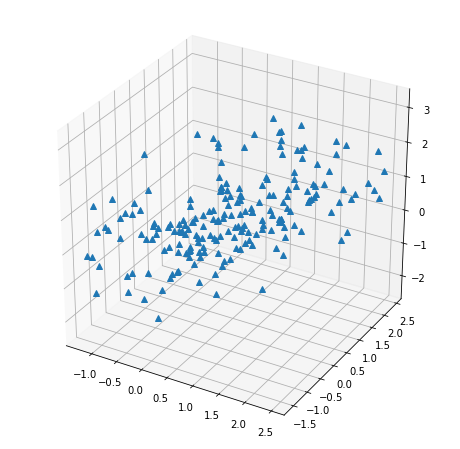

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_approx[:, 0], x_approx[:, 1], x_approx[:, 2], '^')

plt.show() # all the data lies in a single plane

In [31]:
all_data_t = all_data.T
cov = np.cov(all_data_t) # co-variance matrix

print(cov)

[[1.12068385 0.28540803 0.27218014]
 [0.28540803 1.0968522  0.22621447]
 [0.27218014 0.22621447 1.25488185]]


In [38]:
eig_val, eig_vectors = np.linalg.eig(cov) #eigen values and eigen vectors

In [39]:
eig_val_vector_pair = []

for i in range(len(eig_val)):
    eig_vec = eig_vectors[:, i]
    eig_val_vector_pair.append((eig_val[i], eig_vec))

eig_val_vector_pair.sort(reverse=True)

eig_val_vector_pair

[(1.6847975576666312, array([-0.57010864, -0.52112343, -0.6351429 ])),
 (0.9674137246194424, array([-0.36362839, -0.53318488,  0.76386404])),
 (0.8202066209539679, array([-0.73671604,  0.66644148,  0.11447803]))]